<a href="https://colab.research.google.com/github/Harrishart90/Stock-Market-Analysis-Prediction-Using-Indicators/blob/main/Stock_Market_Analysis_Prediction_ML(Classiifcation_Final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Classification Superivised Machine Learning

# Machine Learning Workflow
# 1. Read the Stock Market Analysis Predcition Data Set
# 2. Data Transformation(Cleaning, Preprocessing): Extract, Transform, Load(ETL)
# 3. Split the Stcok Market Datset Will Go Up or Down
# 4. Training(70%) and Testing(30%)
# 5. Training the Model using Scientific Algorithms
# 6. Evalaution(accuracy)
# 7. Prediction

In [3]:
# a) Reading libraries
import kagglehub
import pandas as pd
import os

# Download latest version and identify the path(location) and files
path = kagglehub.dataset_download("s3programmer/stock-market-dataset-for-predictive-analysis")
print(path)
print(os.listdir(path))

# Join the path and the file, then read using pandas
# Note: You may need to adjust the filename based on what's shown in os.listdir(path)
file_path = os.path.join(path, "stock_market_data_large.csv")  # Adjust filename as needed
data = pd.read_csv(file_path)
data.head(10)

100%|██████████| 947k/947k [00:00<00:00, 1.00MB/s]

Extracting files...


/root/.cache/kagglehub/datasets/s3programmer/stock-market-dataset-for-predictive-analysis/versions/1
['stock_market_data_large.csv']


,Date,Open,High,Low,Close,Volume,RSI,MACD,Sentiment,Target
0,2010-01-01,100.309172,102.741242,99.822837,101.381330,743835,75.905800,0.000000,0.058089,0
1,2010-01-04,101.147509,101.681257,99.244474,100.396541,2693069,81.444127,-0.078559,0.751219,1
2,2010-01-05,101.567491,103.949668,101.509347,103.012156,3027306,71.544018,0.069441,0.979723,1
3,2010-01-06,104.247814,106.652559,102.760082,105.846343,4341338,73.683548,0.410693,-0.858008,0
4,2010-01-07,105.339440,105.983592,103.517541,104.721465,2106182,72.675179,0.583641,0.264456,0
5,2010-01-08,103.706622,106.241324,103.106346,104.405219,3688429,62.470552,0.687263,-0.063076,1
6,2010-01-11,106.970913,108.267172,105.139529,106.597955,3909135,65.151281,0.935535,0.078400,1
7,2010-01-12,108.463029,111.081403,107.759084,109.603060,1756061,55.483691,1.359113,-0.596560,0
8,2010-01-13,107.276693,109.498200,106.060857,107.793970,915340,46.913708,1.531172,0.788708,1
9,2010-01-14,108.830229,110.679572,106.818216,109.003930,3990597,46.387851,1.745048,-0.426418,0


In [4]:
# STEP2: Data Transfromation, Data Cleaning, Data Preprocessing
# "Garbage in, Garbage Out"
# It ensures that we are working with a proper dataset.
# a) Handle Missing Records(Remove or Replace)
# b) Handle redundant records(duplicates)
# c) Handle Outliers
# d) Feature Engineering
# e) Data Normalization
# f) Data Standardization
# g) Label Encoding
# h) One-hot Encoding

# Research on this Concepts
# Label Encoding: Converting data from one type to another one
# In the Dataset above the Outcome Column has been label encoded
# 1 -> Go UP
# 0 -> Go Down

In [5]:
import warnings
warnings.filterwarnings('ignore')

data["Target"].replace({ 1: "Go up", 0 : "Go Down"}, inplace = True)
data

# Removing the Date Column
data.drop("Date", axis = 1, inplace = True)
data

,Open,High,Low,Close,Volume,RSI,MACD,Sentiment,Target
0,100.309172,102.741242,99.822837,101.381330,743835,75.905800,0.000000,0.058089,Go Down
1,101.147509,101.681257,99.244474,100.396541,2693069,81.444127,-0.078559,0.751219,Go up
2,101.567491,103.949668,101.509347,103.012156,3027306,71.544018,0.069441,0.979723,Go up
3,104.247814,106.652559,102.760082,105.846343,4341338,73.683548,0.410693,-0.858008,Go Down
4,105.339440,105.983592,103.517541,104.721465,2106182,72.675179,0.583641,0.264456,Go Down
...,...,...,...,...,...,...,...,...,...
13642,43.275041,44.410580,41.142970,41.605722,2764137,31.764587,-1.807202,0.038068,Go Down
13643,39.024132,41.984653,38.621644,39.210815,1784838,30.837099,-2.290434,0.115523,Go up
13644,42.843140,43.711000,39.998519,42.635796,2142188,29.479917,-2.369715,0.636065,Go Down
13645,41.636775,42.925515,40.098662,41.206622,1160555,34.398739,-2.518833,-0.143514,Go Down


In [6]:
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9,]
print(numbers[8])

9


In [7]:
# STEP3: Supervised Machine Learning (Input and Outcome(Labels))
# Split into X-> Features and Y-Outcome

array = data.values
array.shape

X = array[:, 0:8]
Y = array[:, 8]


In [8]:
# STEP4: Splitting Records into Training(70%) and Testing(30%)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(9552, 8)
(4095, 8)
(9552,)
(4095,)


In [9]:
countries = []
countries.append("Kenya")
countries.append("Tanzania")
countries.append("Uganda")
countries.append("Rwanda")
print(countries)

for country in countries:
  print(country)

['Kenya', 'Tanzania', 'Uganda', 'Rwanda']
Kenya
Tanzania
Uganda
Rwanda


In [10]:
# CROSS VALIDATION
# IMPORT ALL THE ALOGARITHMS

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Process to Determine the Best Model for particular Datasets
models = []
models.append(('DTree', DecisionTreeClassifier()))
models.append(('Gaussian', GaussianNB()))
models.append(('KNC', KNeighborsClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Gradient Boosting', GradientBoostingClassifier()))
models.append(('Support Machines', SVC(gamma = 'auto')))
models.append(('LR', LogisticRegression(max_iter=1000)))
print(models)


# Create a for loop so that each model is tested in turn
for name, model in models:
  # Here we do a 10 split K-FOLD
  from sklearn.model_selection import cross_val_score, KFold

  kfold = KFold(n_splits = 10, random_state=42, shuffle=True)
  # We get the results for each Fold
  # 200 records/10 = 20
  cv_results = cross_val_score(model, X_train, Y_train, cv = kfold,
  scoring='accuracy')
  # Get the average of all Folds



[('DTree', DecisionTreeClassifier()), ('Gaussian', GaussianNB()), ('KNC', KNeighborsClassifier()), ('Random Forest', RandomForestClassifier()), ('Gradient Boosting', GradientBoostingClassifier()), ('Support Machines', SVC(gamma='auto')), ('LR', LogisticRegression(max_iter=1000))]


In [11]:
# Step 5 Training the Model Using Scientific ML Alogrithms

# Machine Learning: Scientific ALgorithms(Mathematical Models)
# Deep Learning: Neural Networks(Simulate human biological brain)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, Y_train)



RandomForestClassifier()

In [12]:
# Step6: Evaluation Classification Models

# Several Ways:
# a) Accuracy Score
# b) Confusion Matrix
# c) Classification Report
# d) Precision
# e) Recall

# Research on this evalaution techniques

# This are the model predictions, after only supplying X_test
model_predictions = model.predict(X_test)
print(model_predictions)

print("================================")

# This are the actual predictions
print(Y_test)

print("================================")
# Percentage Accuracy: Accuracy Score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(model_predictions, Y_test) * 100
print(accuracy)


['Go Down' 'Go up' 'Go up' ... 'Go Down' 'Go up' 'Go Down']
['Go Down' 'Go up' 'Go Down' ... 'Go up' 'Go Down' 'Go Down']
55.14041514041514


<Axes: >

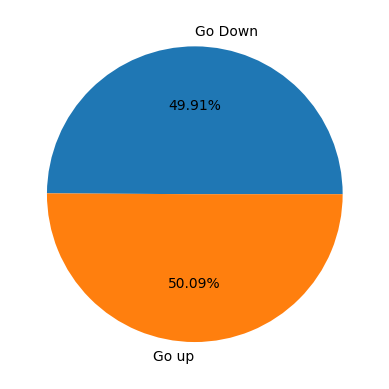

In [13]:
# Investigae the reason for the Lower Accuracy
# 1. The Data was Bias on patients who were Non Diabetic
# Jenga Elearning: Exploratory Data Analysis -> matplotlib, searborn and plotly

data.groupby("Target").size().plot(kind="pie", autopct="%.2f%%")





In [24]:
#7 Predictions
data = [[100.309172,102.741242,99.822837,101.381330,743835,75.905800,0.000000,0.058089]]
data = model.predict(data)
print(data)


['Go up']
